In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import laspy
import matplotlib.pyplot as plt
from torchvision import models
from torchvision.models.segmentation import deeplabv3_resnet50


In [4]:
# 读取 LiDAR 数据
def read_las_file(file_path):
    las = laspy.read(file_path)
    return las

# 提取点云数据
def extract_points(las):
    x = las.x
    y = las.y
    z = las.z
    intensity = las.intensity
    return np.vstack((x, y, z, intensity)).transpose()

In [10]:
# 可视化点云数据
def visualize_point_cloud(las, point_size=0.01):
    # 获取点云坐标
    x = las.x
    y = las.y
    z = las.z
    
    # 创建3D散点图
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # 绘制点云
    scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=point_size)
    
    # 设置坐标轴标签
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # 添加颜色条
    plt.colorbar(scatter, label='Elevation')
    
    # 设置标题
    plt.title('LAS Point Cloud Visualization')
    
    # 显示图形
    plt.show()

In [4]:
# 数据预处理
def preprocess_data(points):
    scaler = StandardScaler()
    return scaler.fit_transform(points)

In [5]:
# 可视化点云
def visualize_point_cloud(points):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 3], cmap='viridis', s=1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('Point Cloud Visualization')
    plt.show()

In [15]:
# 主函数
def main():
    file_path = 'test.las'  
    
    try:
        # 读取LAS文件
        las_data = read_las_file(file_path)
        
        # 可视化点云数据
        visualize_point_cloud(las_data)
        
        print("点云数据已成功可视化。")
    except FileNotFoundError:
        print(f"错误：找不到文件 '{file_path}'。请确保文件路径正确。")
    except Exception as e:
        print(f"发生错误：{str(e)}")
    
    # 保存处理后的数据
    #np.save('/mnt/data/processed_points.npy', processed_points)
    #print("处理后的数据已保存为 processed_points.npy")

In [20]:
las_data = read_las_file("test.las")
print(las_data.shape)

AttributeError: LasData object has no attribute 'shape'

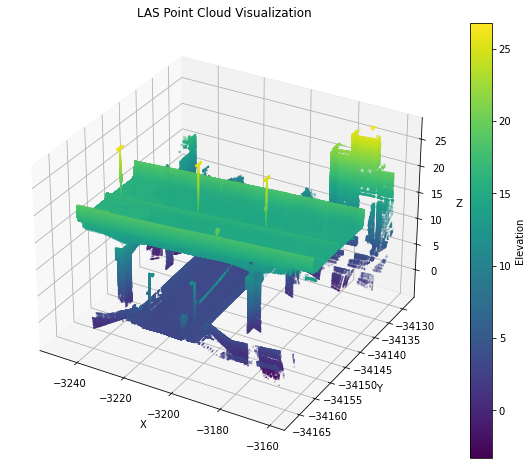

点云数据已成功可视化。


NameError: name 'las' is not defined

In [16]:
if __name__ == "__main__":
    main()

In [21]:
with laspy.open('test.las') as fh:
    print('Points from Header:', fh.header.point_count)
    las = fh.read()
    print(las)
    print('Points from data:', len(las.points))
    ground_pts = las.classification == 2
    bins, counts = np.unique(las.return_number[ground_pts], return_counts=True)
    print('Ground Point Return Number distribution:')
    for r,c in zip(bins,counts):
        print('    {}:{}'.format(r,c))

Points from Header: 19813475
<LasData(1.2, point fmt: <PointFormat(3, 0 bytes of extra dims)>, 19813475 points, 0 vlrs)>
Points from data: 19813475
Ground Point Return Number distribution:
    1:5074580


In [31]:
point_data = las.points
print(point_data.x)

<ScaledArrayView([-3240.155 -3240.472 -3240.518 ... -3170.121 -3170.044 -3170.01 ])>


In [26]:
print(point_data)

<ScaleAwarePointRecord(fmt: <PointFormat(3, 0 bytes of extra dims)>, len: 19813475, point size: 34)>


AttributeError: shape is not a valid dimension

In [23]:
print(las.point_format.dimension_names)


<generator object PointFormat.dimension_names.<locals>.<genexpr> at 0x000002EF8133A650>
